## Notebook for the annotation transferring from 3 donors Gut Cell Atlas to Joanito 2022 data
### Developed by: Anna Maguza

### Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich

### 21 November 2022

#### Load required packages

In [16]:
import scnym

In [17]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an

 

#### Setup Cells


In [18]:
%matplotlib inline

In [19]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.18.2 scipy==1.4.1 pandas==1.0.4 scikit-learn==0.22.2.post1 statsmodels==0.13.5 python-igraph==0.10.2 louvain==0.7.0 leidenalg==0.8.0


#### Upload Data

##### Upload Control data (3 donors)

In [20]:
input_Normal_file = '/lustre/groups/talaveralopez/datasets/Colorectal_cancer/Raw_data/Normal Control Gut Cell Atlas/Full_obj_raw_counts_nosoupx_v2.h5ad'  # the file that will store the analysis results
output_Normal_file = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Gut_cell_atlas_three_donors_output.h5ad'  # the file that will store the analysis results

In [21]:
#Anndata upload
control_ad = sc.read_h5ad(input_Normal_file)
control_ad.X

<428469x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 760344941 stored elements in Compressed Sparse Row format>

##### Upload cancer data (Joanito-2022)

In [22]:
#Loading again to further processing
input_CRC_file = '/lustre/groups/talaveralopez/datasets/Colorectal_cancer/Raw_data/Joanito, 2022/Anndata Raw/joanito_2022_anndata_raw-2.h5ad'  # the file that will store the analysis results
output_CRC_file = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/joanito_2022_anndata_output.h5ad'  # the file that will store the analysis results

In [23]:
#Anndata upload
Joanito_ad = sc.read_h5ad(input_CRC_file)
Joanito_ad.X

<373058x33287 sparse matrix of type '<class 'numpy.float32'>'
	with 741331835 stored elements in Compressed Sparse Row format>

### Quick Filtering of Joanito file

In [25]:
#Filter out normal (non-tumor samles)
Joanito_ad_tumor = Joanito_ad[Joanito_ad.obs['sample.origin'] == "Tumor", :]
del Joanito_ad

In [26]:
#Filtering by quality metrics
#Calculate quality control metrics
sc.pp.calculate_qc_metrics(Joanito_ad_tumor, expr_type = 'counts', var_type='genes', percent_top = None, inplace=True)
#Filtering by genes
Joanito_ad_tumor = Joanito_ad_tumor[Joanito_ad_tumor.obs.n_genes_by_counts < 4000, :]
Joanito_ad_tumor = Joanito_ad_tumor[Joanito_ad_tumor.obs.n_genes_by_counts > 200, :]
#Filtering by counts
Joanito_ad_tumor = Joanito_ad_tumor[Joanito_ad_tumor.obs.total_counts < 20000, :]

Trying to set attribute `.obs` of view, copying.


In [27]:
#Creating a new column in obs
Joanito_ad_tumor.obs["category"] = "Unlabeled"
Joanito_ad_tumor.obs

Trying to set attribute `.obs` of view, copying.


,cell.ID,nFeature_RNA,percent.mt,sample.ID,patient.ID,sample.origin,dataset_x,cell.type,iCMS,msi,...,APC,PIK3CA,LymphNode,Normal,Tumor,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,category
1,CRC16_MUX8563_AAAGATGCAGAAGCAC-1,4759,23.734351,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,...,mut,wt,0.0,1.0,4.0,1531,7.334329,3259.0,8.089482,Unlabeled
3,CRC16_MUX8563_ACAGCCGGTCTCTTAT-1,2499,11.020450,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,...,mut,wt,0.0,1.0,4.0,1686,7.430707,3771.0,8.235361,Unlabeled
5,CRC16_MUX8563_ACATACGGTTACGTCA-1,3745,17.618134,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,...,mut,wt,0.0,1.0,4.0,3080,8.033009,7321.0,8.898639,Unlabeled
6,CRC16_MUX8563_ACATGGTGTCCATGAT-1,6874,17.782717,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,...,mut,wt,0.0,1.0,4.0,1383,7.232733,2459.0,7.807917,Unlabeled
8,CRC16_MUX8563_ACGAGGACATCTGGTA-1,5116,18.923530,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,...,mut,wt,0.0,1.0,4.0,1562,7.354362,3136.0,8.051023,Unlabeled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366883,KUL5_EXT127_TTGGAACGTGAAAGAG-1,1144,8.299758,EXT127,SC044,Tumor,KUL5,T_NK,nan,nan,...,wt,nan,0.0,2.0,3.0,3298,8.101375,8446.0,9.041567,Unlabeled
366887,KUL5_EXT127_TTGGCAACATGGTAGG-1,1235,2.585657,EXT127,SC044,Tumor,KUL5,PlasmaB,nan,nan,...,wt,nan,0.0,2.0,3.0,2786,7.932721,6576.0,8.791334,Unlabeled
366889,KUL5_EXT127_TTTCCTCCATTACGAC-1,833,6.911582,EXT127,SC044,Tumor,KUL5,T_NK,nan,nan,...,wt,nan,0.0,2.0,3.0,2077,7.639161,4410.0,8.391857,Unlabeled
366891,KUL5_EXT127_TTTGCGCGTTCGTGAT-1,1472,4.568457,EXT127,SC044,Tumor,KUL5,T_NK,nan,nan,...,wt,nan,0.0,2.0,3.0,2104,7.652071,4797.0,8.475954,Unlabeled


### Quick Filtering of Gut Cell Atlas file

In [28]:
#Remove Pediatric Crohn Disease
control_ad_clean = control_ad[~control_ad.obs['Diagnosis'].isin(['Pediatric Crohn Disease']),:]
del control_ad
#Deleting the lymph node samples
control_ad_clean = control_ad_clean[~control_ad_clean.obs['Region'].isin(['lymph node']),:]
#Adding percentage of ribosomial genes
control_ad_clean.var['ribo'] = control_ad_clean.var_names.str.startswith(("RPS","RPL"))  # annotate the group of ribosomal genes as 'ribo'
sc.pp.calculate_qc_metrics(control_ad_clean, qc_vars=['ribo'], percent_top=None, log1p=False, inplace=True)
#Filtering by genes
control_ad_clean = control_ad_clean[control_ad_clean.obs.n_genes_by_counts < 5000, :]
control_ad_clean = control_ad_clean[control_ad_clean.obs.n_genes_by_counts > 200, :]
#Filtering by counts
control_ad_clean = control_ad_clean[control_ad_clean.obs.total_counts < 50000, :]
# Chose three adult donors for further analysis
three_donors = control_ad_clean[control_ad_clean.obs['Sample name'].isin(['A33 (414C)', 'A34 (417C)', 'A32 (411C)']), :]
del control_ad_clean

Trying to set attribute `.var` of view, copying.


#### Renaming columns that they have similar names with control dataset

In [29]:
three_donors.obs_keys

<bound method AnnData.obs_keys of View of AnnData object with n_obs × n_vars = 83388 × 33538
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Gender', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'category', 'Age_group', 'Integrated_05', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'>

In [51]:
Joanito_ad_tumor.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 150571 × 33287
    obs: 'cell.ID', 'nFeature_RNA', 'percent.mt', 'sample.ID', 'patient.ID', 'sample.origin', 'dataset_x', 'cell.type', 'iCMS', 'msi', 'dataset_y', 'Gender', 'Age at recruitment', 'MSS/MSI', 'Site', 'Sidedness', 'Group Stage', 'Stage TNM', 'iCMS.transcriptomic', 'iCMS.inferCNV', 'KRAS', 'BRAF', 'TP53', 'APC', 'PIK3CA', 'LymphNode', 'Normal', 'Tumor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'category'
    var: 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'>

In [50]:
# Make cell.ID column in Joanito_ad_tumor the index
Joanito_ad_tumor.obs.index = Joanito_ad_tumor.obs['cell.ID']
# Delete cell.ID column in Joanito_ad_tumor
del Joanito_ad_tumor.obs['cell.ID']

In [55]:
Joanito_ad_tumor.obs

,nFeature_RNA,percent.mt,sample.ID,patient.ID,sample.origin,dataset_x,cell.type,iCMS,msi,dataset_y,...,APC,PIK3CA,LymphNode,Normal,Tumor,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,category
cell.ID,,,,,,,,,,,,,,,,,,,,,
CRC16_MUX8563_AAAGATGCAGAAGCAC-1,4759,23.734351,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,CRC-SG1,...,mut,wt,0.0,1.0,4.0,1531,7.334329,3259.0,8.089482,Unlabeled
CRC16_MUX8563_ACAGCCGGTCTCTTAT-1,2499,11.020450,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,CRC-SG1,...,mut,wt,0.0,1.0,4.0,1686,7.430707,3771.0,8.235361,Unlabeled
CRC16_MUX8563_ACATACGGTTACGTCA-1,3745,17.618134,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,CRC-SG1,...,mut,wt,0.0,1.0,4.0,3080,8.033009,7321.0,8.898639,Unlabeled
CRC16_MUX8563_ACATGGTGTCCATGAT-1,6874,17.782717,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,CRC-SG1,...,mut,wt,0.0,1.0,4.0,1383,7.232733,2459.0,7.807917,Unlabeled
CRC16_MUX8563_ACGAGGACATCTGGTA-1,5116,18.923530,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS,CRC-SG1,...,mut,wt,0.0,1.0,4.0,1562,7.354362,3136.0,8.051023,Unlabeled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KUL5_EXT127_TTGGAACGTGAAAGAG-1,1144,8.299758,EXT127,SC044,Tumor,KUL5,T_NK,nan,nan,KUL5,...,wt,nan,0.0,2.0,3.0,3298,8.101375,8446.0,9.041567,Unlabeled
KUL5_EXT127_TTGGCAACATGGTAGG-1,1235,2.585657,EXT127,SC044,Tumor,KUL5,PlasmaB,nan,nan,KUL5,...,wt,nan,0.0,2.0,3.0,2786,7.932721,6576.0,8.791334,Unlabeled
KUL5_EXT127_TTTCCTCCATTACGAC-1,833,6.911582,EXT127,SC044,Tumor,KUL5,T_NK,nan,nan,KUL5,...,wt,nan,0.0,2.0,3.0,2077,7.639161,4410.0,8.391857,Unlabeled


In [57]:
Joanito_ad_tumor.obs["Study"] = "Joanito, 2022"
three_donors.obs["Study"] = "Gut Cell Atlas"
Joanito_ad_tumor.obs.rename(columns={"Age at recruitment": "Age"}, inplace=True)
Joanito_ad_tumor.obs.rename(columns={"percent.mt": "pct_counts_mt"}, inplace=True)
Joanito_ad_tumor.obs.rename(columns={"Site": "Region code"}, inplace=True)

Trying to set attribute `.obs` of view, copying.


#### LogP1 normalization


In [58]:
#Log normalization of both datasets
sc.pp.log1p(Joanito_ad_tumor)
sc.pp.log1p(three_donors)

### Merging of two datasets

In [59]:
merged_ad =Joanito_ad_tumor.concatenate(three_donors)

In [62]:
del Joanito_ad_tumor, three_donors

### Python API (neural network training)

In [63]:
from scnym.api import scnym_api

In [64]:
#Show cell types
merged_ad.obs['category'].value_counts()

Unlabeled       150571
Epithelial       59661
Plasma cells     12903
Mesenchymal       4420
Endothelial       3697
Myeloid           1299
T cells            682
B cells            543
Neuronal           183
Name: category, dtype: int64

### Predict cell labels

In [66]:
scnym_api(
    adata=merged_ad,
    task='train',
    groupby='category',
    out_path='./scnym_output',
    config='new_identity_discovery',
)

No CUDA device found.
Computations will be performed on the CPU.
Add a CUDA compute device to improve speed dramatically.

150571 unlabeled observations found.
Using unlabeled data as a target set for semi-supervised, adversarial training.

training examples:  (83388, 33264)
target   examples:  (150571, 33264)
X:  (83388, 33264)
y:  (83388,)
Not weighting classes and not balancing classes.
Found 2 unique domains.
Using MixMatch for semi-supervised learning
Scaling ICL over 100 epochs, 0 epochs for burn in.
Scaling ICL over 20 epochs, 0 epochs for burn in.
Using a Domain Adaptation Loss.
Training...
Saving best model weights...______________|
Saved best weights.
Trainer has a `dan_criterion`.
Saving DAN weights...
Saving best model weights...______________|
Saved best weights.
Trainer has a `dan_criterion`.
Saving DAN weights...
Saving best model weights...______________|
Saved best weights.
Trainer has a `dan_criterion`.
Saving DAN weights...
Saving best model weights...______________|

In [71]:
scnym_api(
    adata=merged_ad,
    task='predict',
    key_added='scNym',
    trained_model='./scnym_output',
    out_path='./scnym_output',
    config='new_identity_discovery',
)

No CUDA device found.
Computations will be performed on the CPU.
Add a CUDA compute device to improve speed dramatically.



Finding cell types:   0%|                               | 0/229 [00:00<?, ?it/s]

Loaded model predicting 8 classes from 33264 features
['B cells' 'Endothelial' 'Epithelial' 'Mesenchymal' 'Myeloid' 'Neuronal'
 'Plasma cells' 'T cells']
Building a classification matrix...
Gene names match exactly, returning input.
Predicting cell types...


Finding cell types: 100%|█████████████████████| 229/229 [00:49<00:00,  4.60it/s]


Extracting model embeddings...


In [72]:
merged_ad.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 233959 × 33264
    obs: 'nFeature_RNA', 'pct_counts_mt', 'sample.ID', 'patient.ID', 'sample.origin', 'dataset_x', 'cell.type', 'iCMS', 'msi', 'dataset_y', 'Gender', 'Age', 'MSS/MSI', 'Region code', 'Sidedness', 'Group Stage', 'Stage TNM', 'iCMS.transcriptomic', 'iCMS.inferCNV', 'KRAS', 'BRAF', 'TP53', 'APC', 'PIK3CA', 'LymphNode', 'Normal', 'Tumor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'category', 'Study', 'Sample name', 'Diagnosis', 'sample name', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'total_counts_mt', 'doublet_scores', 'predicted_doublets', 'Age_group', 'Integrated_05', 'total_counts_ribo', 'pct_counts_ribo', 'scNym', 'scNym_confidence'
    var: 'feature_types', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropou

In [73]:
merged_ad.obs['scNym'].value_counts

<bound method IndexOpsMixin.value_counts of CRC16_MUX8563_AAAGATGCAGAAGCAC-1-0      Epithelial
CRC16_MUX8563_ACAGCCGGTCTCTTAT-1-0      Epithelial
CRC16_MUX8563_ACATACGGTTACGTCA-1-0      Epithelial
CRC16_MUX8563_ACATGGTGTCCATGAT-1-0      Epithelial
CRC16_MUX8563_ACGAGGACATCTGGTA-1-0      Epithelial
                                           ...    
TTTATGCTCTTCCTTC-1-WTDAtest7844019-1    Epithelial
TTTCCTCTCTCGTTTA-1-WTDAtest7844019-1    Epithelial
TTTGCGCCACACCGAC-1-WTDAtest7844019-1    Epithelial
TTTGCGCTCCCTGACT-1-WTDAtest7844019-1    Epithelial
TTTGGTTTCTTGCCGT-1-WTDAtest7844019-1    Epithelial
Name: scNym, Length: 233959, dtype: object>

### Visualise label transfer and cofindence using X_scNym

computing neighbors


/home/icb/anna.maguza/miniconda3/envs/scnym_env/lib/python3.8/site-packages/numba/core/typed_passes.py:313: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "miniconda3/envs/scnym_env/lib/python3.8/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/home/icb/anna.maguza/miniconda3/envs/scnym_env/lib/python3.8/site-packages/umap/nndescent.py:91: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:45)
computing UMAP


/home/icb/anna.maguza/miniconda3/envs/scnym_env/lib/python3.8/site-packages/umap/umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:09:10)


... storing 'sample.ID' as categorical
... storing 'patient.ID' as categorical
... storing 'sample.origin' as categorical
... storing 'dataset_x' as categorical
... storing 'cell.type' as categorical
... storing 'iCMS' as categorical
... storing 'msi' as categorical
... storing 'dataset_y' as categorical
... storing 'Gender' as categorical
... storing 'Age' as categorical
... storing 'MSS/MSI' as categorical
... storing 'Region code' as categorical
... storing 'Sidedness' as categorical
... storing 'Group Stage' as categorical
... storing 'Stage TNM' as categorical
... storing 'iCMS.transcriptomic' as categorical
... storing 'iCMS.inferCNV' as categorical
... storing 'KRAS' as categorical
... storing 'BRAF' as categorical
... storing 'TP53' as categorical
... storing 'APC' as categorical
... storing 'PIK3CA' as categorical
... storing 'category' as categorical
... storing 'Study' as categorical
... storing 'Sample name' as categorical
... storing 'Diagnosis' as categorical
... storing 

KeyError: 'Could not find key study in .var_names or .obs.columns.'

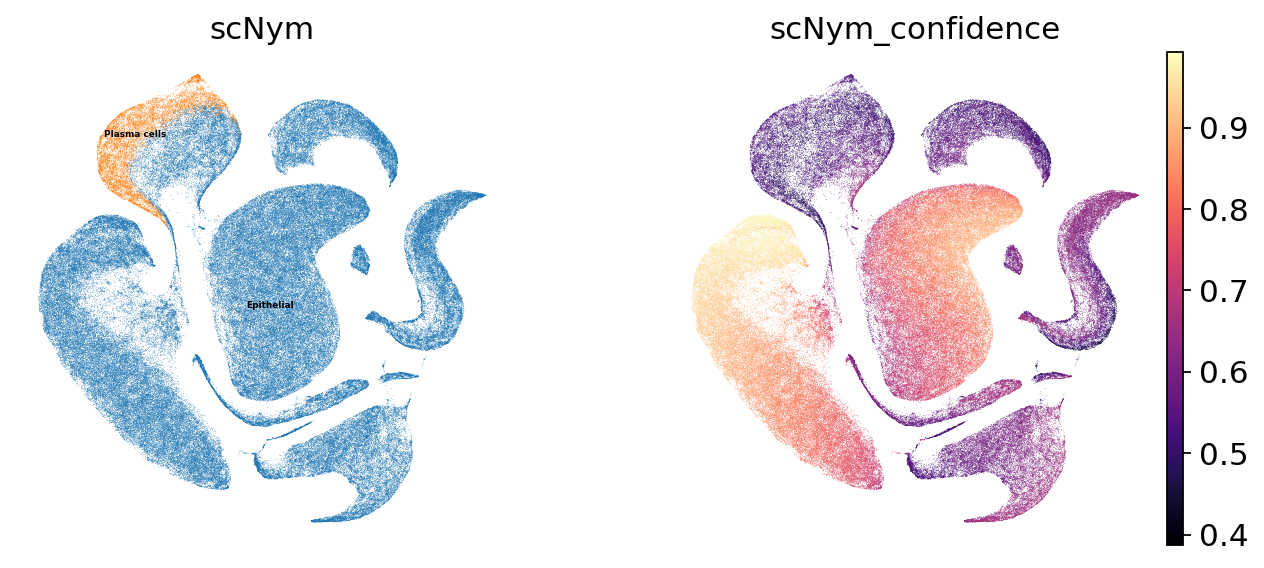

In [74]:
sc.pp.neighbors(merged_ad, use_rep = 'X_scnym', n_neighbors = 50)
sc.tl.umap(merged_ad, min_dist = 0.2, spread = 5, random_state = 1712)

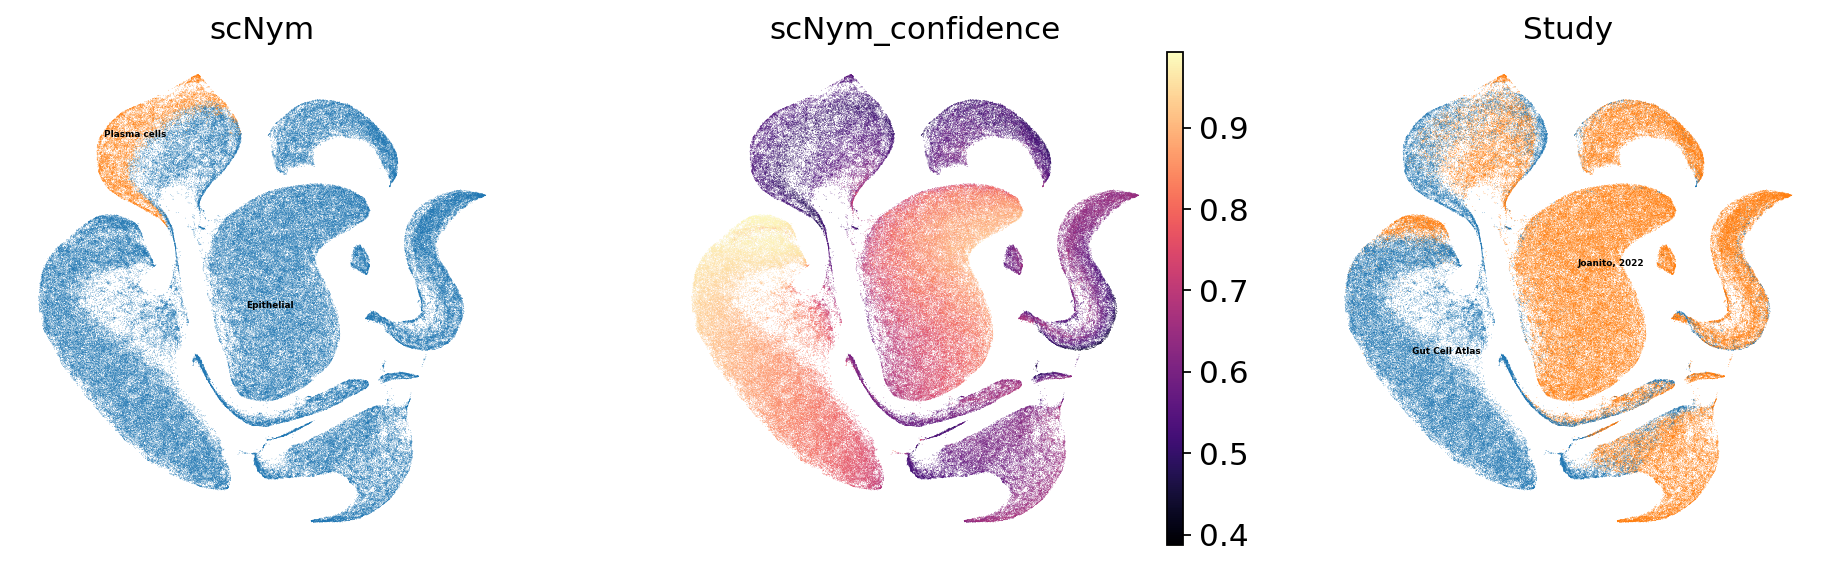

In [75]:
sc.pl.umap(merged_ad, color=['scNym', 'scNym_confidence', "Study"], color_map = "magma", size = 0.3, frameon = False, legend_loc = 'on data', legend_fontsize = 4)

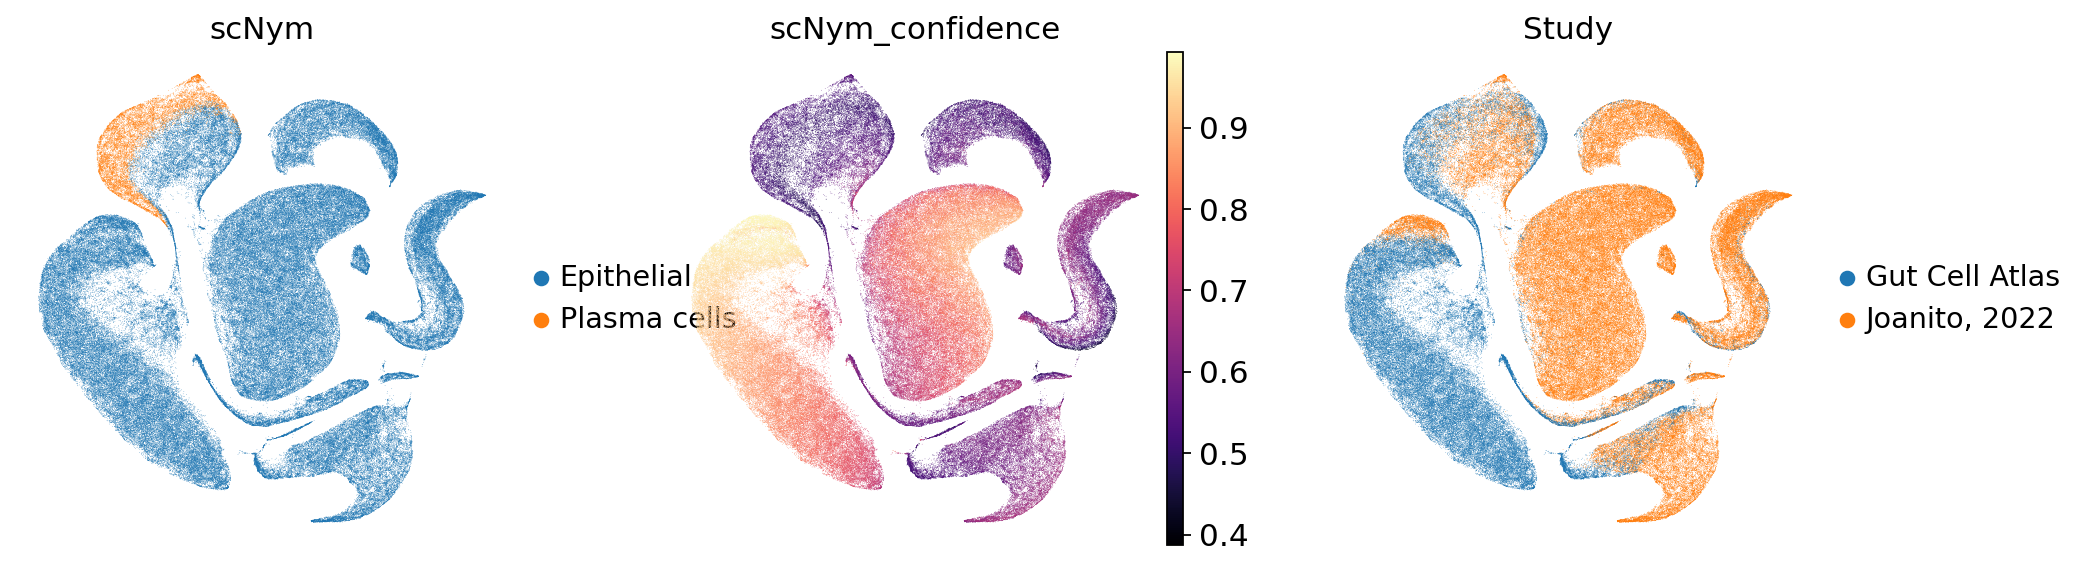

In [77]:
sc.pl.umap(merged_ad, color=['scNym', 'scNym_confidence', "Study"], color_map = "magma", size = 0.3, frameon = False)

### Save object

In [78]:
adata_export = an.AnnData(X = merged_ad.X, obs = merged_ad.obs, var = merged_ad.var, uns = merged_ad.uns, obsm = merged_ad.obsm, obsp = merged_ad.obsp)
adata_export

AnnData object with n_obs × n_vars = 233959 × 33264
    obs: 'nFeature_RNA', 'pct_counts_mt', 'sample.ID', 'patient.ID', 'sample.origin', 'dataset_x', 'cell.type', 'iCMS', 'msi', 'dataset_y', 'Gender', 'Age', 'MSS/MSI', 'Region code', 'Sidedness', 'Group Stage', 'Stage TNM', 'iCMS.transcriptomic', 'iCMS.inferCNV', 'KRAS', 'BRAF', 'TP53', 'APC', 'PIK3CA', 'LymphNode', 'Normal', 'Tumor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'category', 'Study', 'Sample name', 'Diagnosis', 'sample name', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'total_counts_mt', 'doublet_scores', 'predicted_doublets', 'Age_group', 'Integrated_05', 'total_counts_ribo', 'pct_counts_ribo', 'scNym', 'scNym_confidence'
    var: 'feature_types', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 

In [79]:
adata_export.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Post_scnym_Joanito_three_donors_trained.h5ad')